## Probabilistic Viterbi parser

In [1]:
import nltk
from nltk import  PCFG, ViterbiParser

grammar = PCFG.fromstring('''
  NP  -> NNS [0.5] | JJ NNS [0.3] | NP CC NP [0.2]
  NNS -> "cats" [0.1] | "dogs" [0.2] | "mice" [0.3] | NNS CC NNS [0.4]
  JJ  -> "big" [0.4] | "small" [0.6]
  CC  -> "and" [0.9] | "or" [0.1]
  ''')

sent = ['small', 'cats', 'and', 'mice']

parser = ViterbiParser(grammar)
parse = parser.parse(sent)

(NP (JJ small) (NNS (NNS cats) (CC and) (NNS mice))) (p=0.001944)


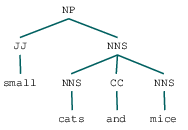

In [2]:
tree = next(parse)
print(tree)
tree

## Trace

Inserting tokens into the most likely constituents table...
   Insert: |=...| small
   Insert: |.=..| cats
   Insert: |..=.| and
   Insert: |...=| mice
Finding the most likely constituents spanning 1 text elements...
   Insert: |=...| JJ -> 'small' [0.6]               0.6000000000 
   Insert: |.=..| NNS -> 'cats' [0.1]               0.1000000000 
   Insert: |.=..| NP -> NNS [0.5]                   0.0500000000 
   Insert: |..=.| CC -> 'and' [0.9]                 0.9000000000 
   Insert: |...=| NNS -> 'mice' [0.3]               0.3000000000 
   Insert: |...=| NP -> NNS [0.5]                   0.1500000000 
Finding the most likely constituents spanning 2 text elements...
   Insert: |==..| NP -> JJ NNS [0.3]                0.0180000000 
Finding the most likely constituents spanning 3 text elements...
   Insert: |.===| NP -> NP CC NP [0.2]              0.0013500000 
   Insert: |.===| NNS -> NNS CC NNS [0.4]           0.0108000000 
   Insert: |.===| NP -> NNS [0.5]                   0.00540

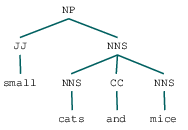

In [3]:
parser = ViterbiParser(grammar)
parser.trace(3)
parse = parser.parse(sent)
next(parse)

## Learn a treebank grammar

In [4]:
import nltk
from nltk.corpus import treebank
productions = []
S = nltk.Nonterminal('S')
for f in treebank.fileids():
    for tree in treebank.parsed_sents(f):
        productions += tree.productions()
grammar = nltk.induce_pcfg(S, productions)
grammar.productions()[10:15]

[NN -> 'centennial' [7.59532e-05],
 NNP -> 'Ian' [0.00010627],
 JJ -> 'impending' [0.000171409],
 WHNP-26 -> WDT [1.0],
 VBN -> 'opened' [0.00187441]]

## Apply the learnt PCFG to Viterbi parser

(S
  (NP-SBJ (PRP it))
  (VP
    (VBZ is)
    (NP-PRD
      (NP (DT a) (JJ small) (NN group))
      (PP
        (IN of)
        (NP (NNS workers) (CC and) (NNS researchers)))))) (p=2.64379e-21)


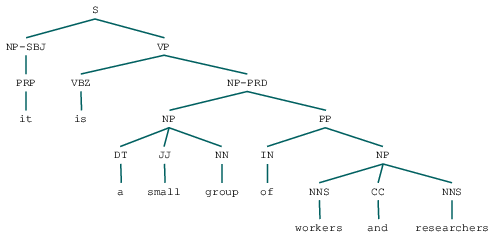

In [5]:
sent = ['it', 'is', 'a', 'small', 'group', 'of', 'workers', 'and', 'researchers']
parser = ViterbiParser(grammar)
parse = parser.parse(sent)
tree = next(parse)
print(tree)
tree

## CoreNLP parser example:

(ROOT
  (S
    (NP (NNP Smith))
    (VP (VBZ jumps) (PP (IN over) (NP (JJ lazy) (NNS dogs))))))


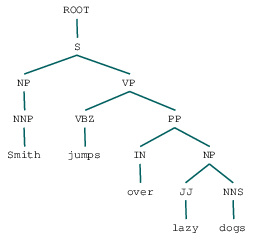

In [6]:
# run in a shell:
# java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000
import nltk
from nltk.parse.corenlp import CoreNLPParser
parser = CoreNLPParser(url='http://localhost:9000')
parse = parser.raw_parse('Smith jumps over lazy dogs')
tree = next(parse)
print(tree)
tree